In [21]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('D:/delete/groceries.csv', header=None, sep=';')

In [24]:
df

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
dtypes: object(1)
memory usage: 77.0+ KB


In [26]:
df.describe()

,0
count,9835
unique,7011
top,canned beer
freq,260


In [27]:
df.isnull().sum()

0    0
dtype: int64

In [28]:
df.shape

(9835, 1)

In [29]:
df.columns

Int64Index([0], dtype='int64')

In [30]:
#Preprocess the data

#In this dataset, the transactions are stored as comma-separated strings in each row.
#We need to split the strings into separate items and convert the data into transaction format.

transactions = []
for i in range(len(df)):
    items = [item.strip() for item in df.values[i][0].split(',') if item.strip()]
    transactions.append(items)

In [31]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk'

In [32]:
#Perform one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [33]:
#Run Apriori algorithm to find frequent itemsets

min_support = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

In [34]:
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


In [41]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.017692,(baking powder),1
2,0.052466,(beef),1
3,0.033249,(berries),1
4,0.026029,(beverages),1
...,...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)",3
329,0.014540,"(root vegetables, yogurt, whole milk)",3
330,0.010473,"(yogurt, soda, whole milk)",3
331,0.015150,"(tropical fruit, yogurt, whole milk)",3


In [43]:
# sorting the dataframe

frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

In [45]:
#Finding top 5 items 

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.02) ][0:5]

,support,itemsets,length
86,0.255516,(whole milk),1
55,0.193493,(other vegetables),1
66,0.183935,(rolls/buns),1
75,0.174377,(soda),1
87,0.139502,(yogurt),1


In [35]:
#Generate association rules

min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

In [36]:
print(rules)

                               antecedents         consequents  \
0               (butter, other vegetables)        (whole milk)   
1          (root vegetables, citrus fruit)  (other vegetables)   
2                           (curd, yogurt)        (whole milk)   
3        (domestic eggs, other vegetables)        (whole milk)   
4            (pip fruit, other vegetables)        (whole milk)   
5            (root vegetables, rolls/buns)  (other vegetables)   
6        (root vegetables, tropical fruit)  (other vegetables)   
7                (root vegetables, yogurt)  (other vegetables)   
8   (other vegetables, whipped/sour cream)        (whole milk)   
9               (yogurt, other vegetables)        (whole milk)   
10           (root vegetables, rolls/buns)        (whole milk)   
11       (root vegetables, tropical fruit)        (whole milk)   
12               (root vegetables, yogurt)        (whole milk)   
13                (tropical fruit, yogurt)        (whole milk)   
14        

In [46]:
# finding association rules with minimum support of 2% and having lift more than 1

rules[(rules['support'] >= 0.02) &
      (rules['lift'] > 1.0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.52834,0.524577


In [47]:
# Sort rules by lift in descending order

rules = rules.sort_values(by=['lift'], ascending=False)

In [48]:
# Filter rules based on desired metrics (e.g., lift, confidence, support)

filtered_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.5)]

In [49]:
# Display the conclusions
for idx, rule in filtered_rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    
    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {support:.3f}")
    print(f"Confidence: {confidence:.3f}")
    print(f"Lift: {lift:.3f}")
    print("-----------------------------------")

Rule: root vegetables, citrus fruit -> other vegetables
Support: 0.010
Confidence: 0.586
Lift: 3.030
-----------------------------------
Rule: root vegetables, tropical fruit -> other vegetables
Support: 0.012
Confidence: 0.585
Lift: 3.021
-----------------------------------
Rule: root vegetables, rolls/buns -> other vegetables
Support: 0.012
Confidence: 0.502
Lift: 2.595
-----------------------------------
Rule: curd, yogurt -> whole milk
Support: 0.010
Confidence: 0.582
Lift: 2.279
-----------------------------------
Rule: butter, other vegetables -> whole milk
Support: 0.011
Confidence: 0.574
Lift: 2.245
-----------------------------------
Rule: root vegetables, tropical fruit -> whole milk
Support: 0.012
Confidence: 0.570
Lift: 2.231
-----------------------------------
Rule: root vegetables, yogurt -> whole milk
Support: 0.015
Confidence: 0.563
Lift: 2.203
-----------------------------------
Rule: domestic eggs, other vegetables -> whole milk
Support: 0.012
Confidence: 0.553
Lift: 

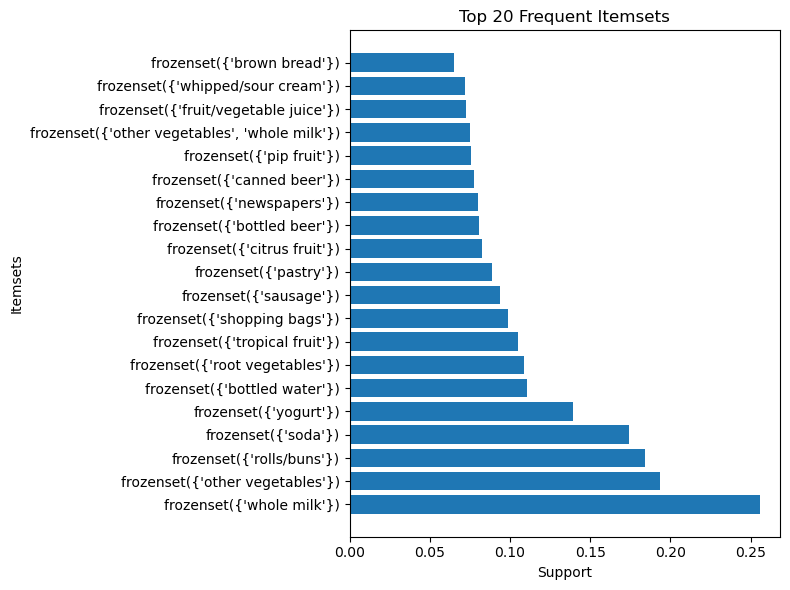

In [37]:
#Visualize the frequent itemsets

top_n = 20
frequent_itemsets_top = frequent_itemsets.nlargest(top_n, 'support')
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), frequent_itemsets_top['support'], align='center')
plt.yticks(range(top_n), frequent_itemsets_top['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top {} Frequent Itemsets'.format(top_n))
plt.tight_layout()
plt.show()

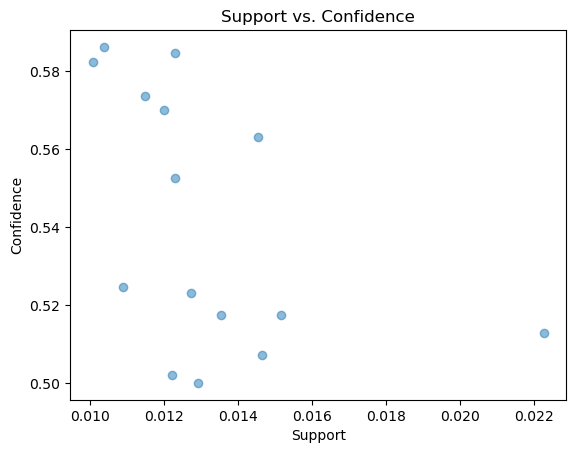

In [38]:
#Visualize the association rules

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()